<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression exercise

We're going to use another house price example, this time from Sacramento.

### 1 - Use the filepath below to read in your DataFrame

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
house_prices_csv = '../assets/data/sacramento_real_estate_transactions.csv'
house_prices=pd.read_csv(house_prices_csv)
house_prices.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


### 2 - Conduct exploratory data analysis on this data set.

Report any notable findings here and any steps you take to clean/process data.

    Note: These EDA checks should be done on every data set we give you, as it will be the first thing you do on a new dataset in the real world.

In [115]:
house_prices.columns


Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [114]:
#dropping negative and 0 sq_ft from dataframe

house_prices=house_prices[house_prices.sq__ft>0]

house_prices[house_prices['sq__ft']<=0]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


### 3 - Our goal will be to predict price. Choose *two* variables that you think might make good predictors of price.

In [ ]:
#sq ft and beds

### 4 - Based on your answer to 3, explore the relationships between your chosen predictors and the target

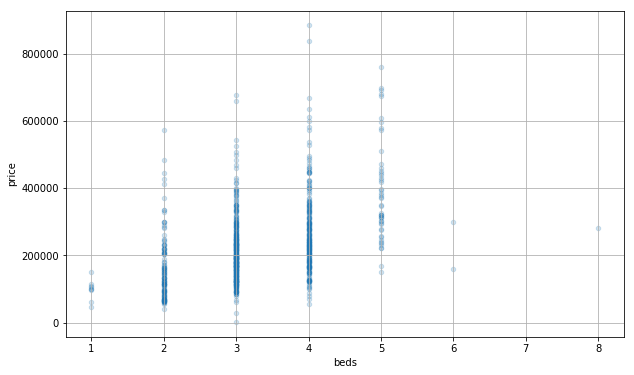

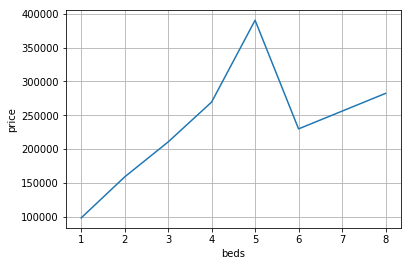

In [126]:
house_prices.plot(kind='scatter', x='beds', y='price', alpha=0.2, figsize=(10, 6))
plt.grid()
plt.show()

#sns.lmplot(x='beds', y='price', data=house_prices, aspect=1.5, scatter_kws={'alpha':0.2})
all_prices=house_prices.groupby("beds")['price'].mean()
plt.plot(all_prices.index,all_prices)
plt.grid()
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

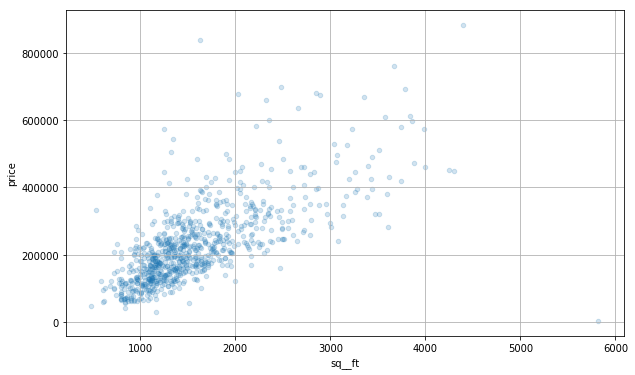

In [123]:
house_prices.plot(kind='scatter', x='sq__ft', y='price', alpha=0.2, figsize=(10, 6))
plt.grid()
plt.show()

### 5 - Build a linear model using the predictors you chose in question 3.

Make sure to:

- do a train/test split
- fit your model
- evaluate your model (with an appropriate metric)

In [128]:
from sklearn.model_selection import train_test_split
X=house_prices[["beds","sq__ft"]]
y=house_prices["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X)

569 244
569 244
     beds  sq__ft
0       2     836
1       3    1167
2       2     796
3       2     852
4       2     797
5       3    1122
6       3    1104
7       3    1177
8       2     941
9       3    1146
10      3     909
11      3    1289
12      1     871
13      3    1020
14      2    1022
15      2    1134
16      2     844
17      2     795
18      2     588
19      3    1356
20      3    1118
21      4    1329
22      4    1240
23      3    1601
24      3     901
25      3    1088
26      3     963
27      3    1119
28      4    1380
29      3    1248
..    ...     ...
952     3    1296
953     2    1189
954     2     795
955     3    1371
956     3    1310
957     3    1262
958     4    1740
959     3    1517
960     3    1450
961     3    1416
962     3     888
963     3    1882
964     3    1302
965     3    1418
967     4    1319
968     4    1770
969     4    1627
971     3    1040
972     3     960
974     3    1456
975     3    1450
976     3    1358
977     4   

In [129]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 6 - Extract the coefficients and the intercept from your model. What is your interpretation of these?

In [137]:
#print(model.coef_)
print(model.intercept_)
'''intercept of 50280 means that the price of 1 bed 
property is on average 50280 (is that correct understanding)'''
print(model.coef_)
'''for each extra bedroom the price drops 8790, 
which does not make sense, but somewhat consistent 
with the graph results which I got above
. For each sq feet the price 
goes up 130, which does make sense (is this correct)'''

50280.46668224101
[-8790.08783331   130.93205207]


'for each extra bedroom the price drops 8790, \nwhich does not make sense, but somewhat consistent \n. For each sq feet the price \ngoes up 130, which does make sense (is this correct)'

In [138]:
y_pred = model.predict(X_test)
y_pred

array([299111.73629548, 194121.8708773 , 192943.48240864, 227753.76791566,
       208524.39660533, 228146.56407188, 251731.97378944, 150914.29369318,
       260748.64503807, 240846.97312297, 231568.43777019, 177886.29642024,
       232336.38973822, 217296.84409423, 188622.72469023, 195937.2792619 ,
       313496.6216791 , 180129.78164989, 115038.91142517, 192925.84206422,
       479649.39575982, 202239.65810583, 215332.86331313, 178296.73292087,
       140998.73842446, 168738.69311954, 166495.20788988, 206298.55172009,
       192681.61830449, 226706.31149907, 304741.81453462, 188997.88050203,
       262188.89761088, 188247.56887842, 147396.76863163, 233532.41855129,
       174743.92717048, 242435.79809226, 217558.70819837, 175267.65537877,
       191503.22983583, 157871.33279747, 156151.57577611, 292582.77403624,
       273335.7623815 , 270830.4130477 , 210881.17354265, 209571.85302192,
       194383.73498144, 242418.15774784, 303039.69785767, 362351.91744677,
       200912.69724068, 3

In [141]:
y_test.head(5)

273    292000
709    216033
247    236250
334    839000
654    165000
Name: price, dtype: int64

### 7 - What is your interpretation of your chosen error metric?

In [143]:
from sklearn import metrics
import numpy as np

y_pred_mean = [y_train.mean()] * len(y_test)

#average absolute value of errors
print('MAE model:', metrics.mean_absolute_error(y_test, y_pred))
print('MAE (dumb model):',metrics.mean_absolute_error(y_test, y_pred_mean))

#squares large errors
print('MSE model:', metrics.mean_squared_error(y_test, y_pred))
print('MSE (dump model):', metrics.mean_squared_error(y_test, y_pred_mean))

#square root out of MSE
print('RMSE model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE (dump model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))

MAE model: 54971.76250147016
MAE (dumb model): 81156.99064363711
MSE model: 6935364975.869877
MSE (dump model): 12893708428.180677
RMSE model: 83278.8387038981
RMSE (dump model): 113550.46643753022


### 8 - Does your model do better than a model that predicts the average price for everything?

In [142]:
'''as per cell above, probable better'''

RMSE (model): 83278.8387038981
RMSE: (dumb model): 113550.46643753022


### 9 - If you haven't already, add *type* as an additional predictor, making sure to deal with it accordingly

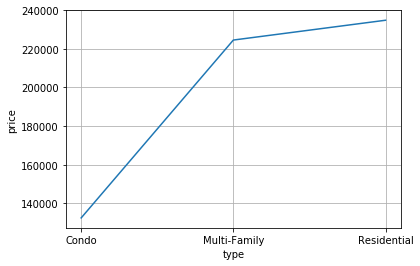

In [148]:
'''it did not work because it is not numeric...
I guess there is smth else I should have done to it?'''
all_prices=house_prices.groupby("type")['price'].mean()
plt.plot(all_prices.index,all_prices)
plt.grid()
plt.xlabel('type')
plt.ylabel('price')
plt.show()


In [150]:
from sklearn.model_selection import train_test_split

X = house_prices[["beds","sq__ft","type"]]
y = house_prices["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X)

569 244
569 244
     beds  sq__ft         type
0       2     836  Residential
1       3    1167  Residential
2       2     796  Residential
3       2     852  Residential
4       2     797  Residential
5       3    1122        Condo
6       3    1104  Residential
7       3    1177  Residential
8       2     941        Condo
9       3    1146  Residential
10      3     909  Residential
11      3    1289  Residential
12      1     871  Residential
13      3    1020  Residential
14      2    1022  Residential
15      2    1134        Condo
16      2     844  Residential
17      2     795        Condo
18      2     588  Residential
19      3    1356  Residential
20      3    1118  Residential
21      4    1329  Residential
22      4    1240  Residential
23      3    1601  Residential
24      3     901  Residential
25      3    1088  Residential
26      3     963  Residential
27      3    1119  Residential
28      4    1380  Residential
29      3    1248  Residential
..    ...     ...      

### 10 - Reflect on your model. What are some possible issues with the predictors you used?

In [151]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Residential'